In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from math import ceil
from scipy import linalg
from IPython.display import Image
from IPython.display import display
plt.style.use('seaborn-white')
%matplotlib inline

In [3]:
#Defining the bell shaped kernel function - used for plotting later on
def kernel_function(xi,x0,tau= .005): 
    return np.exp( - (xi - x0)**2/(2*tau)   )

def lowess_bell_shape_kern(x, y, tau = .005):
    """lowess_bell_shape_kern(x, y, tau = .005) -> yest
    Locally weighted regression: fits a nonparametric regression curve to a scatterplot.
    The arrays x and y contain an equal number of elements; each pair
    (x[i], y[i]) defines a data point in the scatterplot. The function returns
    the estimated (smooth) values of y.
    The kernel function is the bell shaped function with parameter tau. Larger tau will result in a
    smoother curve. 
    """
    m = len(x)
    yest = np.zeros(m)

    #Initializing all weights from the bell shape kernel function    
    w = np.array([np.exp(- (x - x[i])**2/(2*tau)) for i in range(m)])     
    
    #Looping through all x-points
    for i in range(m):
        weights = w[:, i]
        b = np.array([np.sum(weights * y), np.sum(weights * y * x)])
        A = np.array([[np.sum(weights), np.sum(weights * x)],
                    [np.sum(weights * x), np.sum(weights * x * x)]])
        theta = linalg.solve(A, b)
        yest[i] = theta[0] + theta[1] * x[i] 

    return yest

In [4]:
# Update the lists with the converging iterations from your test runs

converging_iters_4 = [91, 257, 29, 48, 23, 22, 37, 16, 15, 37, 29, 13, 17, 5, 13, 17, 4, 7, 12, 13, 9, 9, 9, 13, 9, 21, 9, 9, 9, 6, 10, 6, 9, 9, 9, 9, 13, 5, 5, 9, 5, 5, 5, 5, 5, 10, 5, 5, 10, 5, 5, 5, 13, 5, 9, 9, 5, 5, 9, 9, 9, 5, 9, 5, 5, 6, 5, 10, 5, 5, 9, 5, 5, 9, 9, 10, 6, 9, 5, 5, 5, 5, 5, 6, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 6, 5, 5, 5]
converging_iters_5 = [1133, 1678, 78, 24, 33, 48, 131, 8, 23, 11, 23, 13, 13, 8, 8, 13, 16, 13, 19, 8, 11, 26, 26, 18, 12, 11, 16, 8, 8, 12, 8, 11, 12, 11, 18, 21, 8, 11, 7, 11, 7, 11, 7, 11, 11, 11, 11, 11, 11, 11, 11, 12, 7, 12, 7, 11, 11, 11, 7, 12, 7, 11, 7, 12, 11, 11, 11, 7, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 16, 11, 11, 11, 11, 11, 11, 11, 20, 11, 11, 11, 11]
converging_iters_6 = [13517, 7, 4555, 1469, 41, 163, 11, 11, 11, 11, 55, 68, 7, 7, 97, 7, 7, 31, 13, 72, 41, 7, 25, 13, 11, 7, 7, 7, 7, 73, 7, 6, 13, 13, 85, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 48, 7, 6, 6, 7, 7, 6, 7, 7, 7, 75, 7, 7, 7, 7, 73, 25, 23, 29, 37, 7, 7, 7, 7, 7, 11, 7, 30, 7, 7, 7, 7, 9, 6, 9, 24, 10, 7, 19, 13, 13, 11, 13]

converging_iters_7 = [14399, 123, 225, 15, 785, 106, 163, 12, 36, 22, 38, 22, 29, 29, 22, 22, 29, 22, 29, 15, 36, 15, 22, 22, 22, 15, 22, 22, 22, 29, 22, 22, 15, 29, 16, 15, 16, 22, 22, 15, 15, 15, 15, 9, 15, 15, 15, 15, 9, 17, 23, 15, 9, 9, 9, 15, 9, 23, 9, 9, 9, 9, 9, 9, 57, 36, 24, 24, 24, 24, 38, 15, 15, 8, 8, 17, 29, 17, 15, 15, 29, 15, 15, 15, 15, 15, 17, 31, 17, 22, 29, 15, 15, 15, 15, 15, 15, 15, 15, 19]
converging_iters_8 = [17617, 193, 4073, 841, 33, 22, 57, 25, 31, 26, 49, 15, 49, 25, 49, 22, 14, 25, 25, 57, 17, 14, 17, 17, 41, 65, 41, 17, 26, 14, 10, 46, 126, 142, 54, 38, 25, 13, 17, 26, 17, 17, 17, 13, 17, 38, 13, 42, 10, 17, 26, 10, 18, 25, 26, 17, 17, 41, 18, 17, 18, 33, 10, 41, 17, 33, 17, 17, 17, 17, 33, 34, 17, 17, 25, 17, 33, 17, 17, 17, 41, 17, 25, 17, 17, 33, 17, 17, 57, 130, 229, 153, 30, 90, 354, 41, 82, 18, 130, 34]

x = np.array([i for i in range(1,101)])


iters = {4 : converging_iters_4, 5 : converging_iters_5, 6 : converging_iters_6, 7 : converging_iters_7, 8 : converging_iters_8}
tau = 1.5
queen_map = {4 : lowess_bell_shape_kern(x, np.array(converging_iters_4),tau), 
             5: lowess_bell_shape_kern(x, np.array(converging_iters_5),tau),
             6: lowess_bell_shape_kern(x, np.array(converging_iters_6),tau),
             7: lowess_bell_shape_kern(x, np.array(converging_iters_7),tau),
             8: lowess_bell_shape_kern(x, np.array(converging_iters_8),tau)}






In [5]:
def plot_pred(queen_map, iters, n):
    
    x = np.linspace(1, 100, num=100)
    plt.figure(figsize=(10,5))
    actual = iters[n]
    pred = queen_map[n]
    # LWR = Locally weighted regression
    plt.title('Curve fit for n = '+str(n)+' using LWR')
    plt.scatter(x,actual,c = 'c',label = "actual")
    plt.plot(x,pred,'r',label = "fitted")
    plt.legend(loc="upper right")
    plt.xlabel('Episode number')
    plt.ylabel('Iterations')
    plt.show()

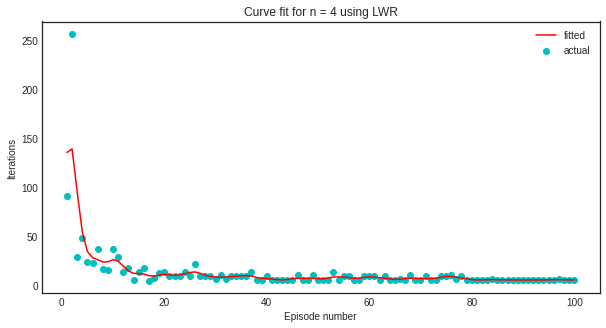

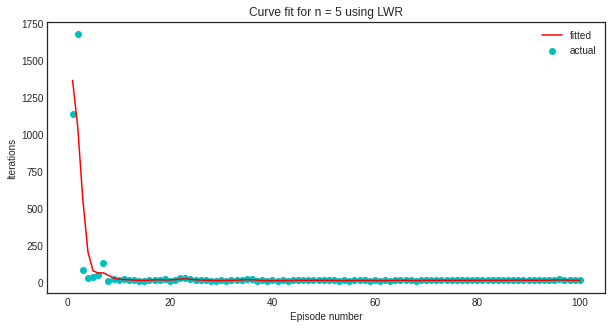

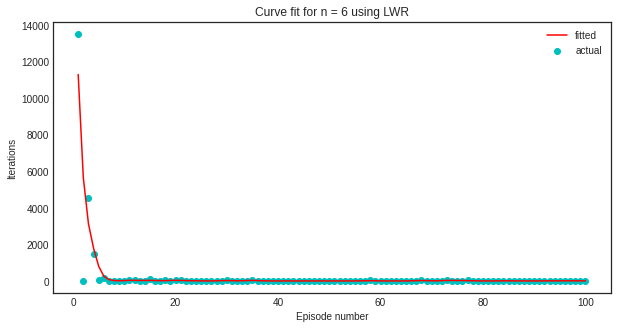

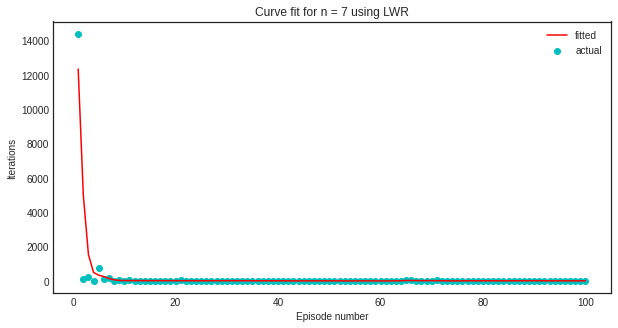

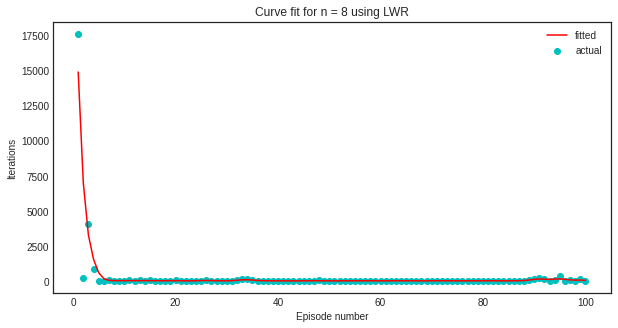

In [6]:
plot_pred(queen_map, iters, 4)
plot_pred(queen_map, iters, 5)
plot_pred(queen_map, iters, 6)
plot_pred(queen_map, iters, 7)
plot_pred(queen_map, iters, 8)

In [9]:
def mod_lowess_bell_shape_kern(x, y, tau = .005):
    """lowess_bell_shape_kern(x, y, tau = .005) -> yest
    Locally weighted regression: fits a nonparametric regression curve to a scatterplot.
    The arrays x and y contain an equal number of elements; each pair
    (x[i], y[i]) defines a data point in the scatterplot. The function returns
    the estimated (smooth) values of y.
    The kernel function is the bell shaped function with parameter tau. Larger tau will result in a
    smoother curve. 
    """
    m = len(x)
    yest = np.zeros(m)

    #Initializing all weights from the bell shape kernel function    
    w = np.array([np.exp(- (x - x[i])**2/(2*tau)) for i in range(m)])     
    thetas = []
    #Looping through all x-points
    for i in range(m):
        weights = w[:, i]
        b = np.array([np.sum(weights * y), np.sum(weights * y * x)])
        A = np.array([[np.sum(weights), np.sum(weights * x)],
                    [np.sum(weights * x), np.sum(weights * x * x)]])
        theta = linalg.solve(A, b)
        yest[i] = theta[0] + theta[1] * x[i] 
        thetas.append((theta[0],theta[1]))
        
    return yest, thetas





In [11]:
# Save the LWR results (coefficients) in a csv

n = 8
x = np.array([i for i in range(1,101)])
y = np.array(iters[n])
y_est, thetas = mod_lowess_bell_shape_kern(x,y,tau=1.5)

data = [[i+1,thetas[i][0],thetas[i][1],y_est[i],iters[n][i]] for i in range(len(thetas))] 
  
# Create the pandas DataFrame 
df = pd.DataFrame(data, columns = ['episode', 'Theta_0', 'Theta_1','y_pred','y_true'])
df.to_csv('lwr_n'+str(n)+'.csv', index=False)

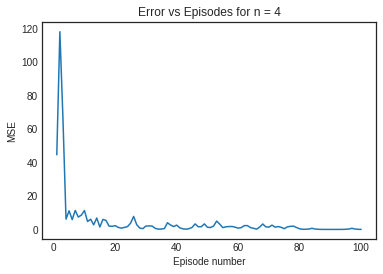

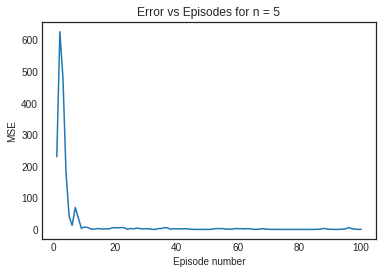

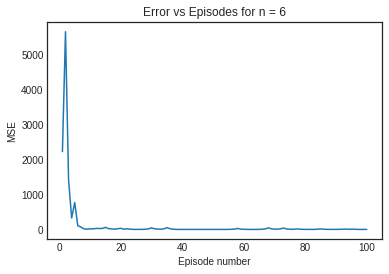

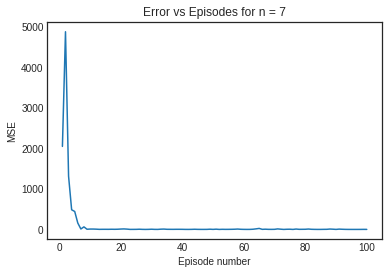

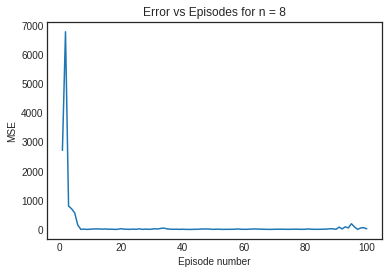

In [12]:
# MSE plot

def error_vs_episodes(n):
    x = np.array([i+1 for i in range(100)])
    y = np.array(iters[n])
    y_est = lowess_bell_shape_kern(x,y,tau=1.5)
    
    error = []
    
    for i in range(100):
        # MSE
        #error.append((y[i] - y_est[i])**2)
        # absolute value
        error.append(np.abs(y[i] - y_est[i]))
    
    plt.title('Error vs Episodes for n = '+str(n))
    plt.plot(x,error)
    plt.xlabel('Episode number')
    plt.ylabel('MSE')
    plt.show()
    
error_vs_episodes(4)
error_vs_episodes(5)
error_vs_episodes(6)
error_vs_episodes(7)
error_vs_episodes(8)

In [13]:
def mse(n):
    x = np.array([i+1 for i in range(100)])
    y = np.array(iters[n])
    y_est = lowess_bell_shape_kern(x,y,tau=1.5)
    
    error = []
    
    for i in range(100):
        # MSE
        error.append((y[i] - y_est[i])**2)
        
    return np.mean(error)
        
def mae(n):
    x = np.array([i+1 for i in range(100)])
    y = np.array(iters[n])
    y_est = lowess_bell_shape_kern(x,y,tau=1.5)
    
    error = []
    
    for i in range(100):
        # MAE
        error.append(np.abs(y[i] - y_est[i]))
        
    return np.mean(error)

In [14]:
for n in range(4,9):
    print(mse(n))

213.04141251628712
7178.792610801429
395593.93907403847
302073.1600328447
550790.7190582034


In [15]:
for n in range(4,9):
    print(mae(n))

4.338186250085011
18.311446365899492
113.91221161303856
97.29335289277633
131.32287706316032
